# **Procesamiento del Lenguaje Natural**
## *Práctica 3 - Análisis de la información de un texto*

### Objetivos de esta práctica:


1. Aprender a analizar la información de un texto.

### Análisis de la información de un texto

En esta práctica vamos a ver algunos métodos que pueden ser de utilidad a la hora de analizar la información de un texto.

Vamos a trabajar con en el texto del archivo “melville-moby_dick.txt” que es un fragmento del libro Moby Dick de Herman Melville. Este archivo se encuentra en PLATEA (Prácticas->Material Complementario).

La clase **Text** de NLTK ( [http://www.nltk.org/api/nltk.html#nltk.text.Text](http://www.nltk.org/api/nltk.html#nltk.text.Text)) incorpora diferentes métodos que permiten analizar la información de un texto: ver el número de apariciones de una palabra en el texto, obtener el contexto de una palabra y encontrar otras que aparezcan en contextos similares, determinar cuáles son las palabras más usadas en el texto, etc.

Para utilizar los métodos de esta clase es necesario crear un objeto **Text** a partir de una lista de tokens. Como estamos trabajando con un archivo (“melville-moby_dick.txt”), tendremos que leer su contenido
y tokenizar el texto para poder crear una instancia de **Text**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os # no es necesario pero para no escribir los directorios cambio al destino
os.chdir("/content/drive/MyDrive/PLN/P3")

In [ ]:
from nltk import TreebankWordTokenizer
from nltk.text import Text

with open('melville-moby_dick.txt', 'r') as file:
  text_content = file.read()
  
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text_content)
text = Text(tokens)

Una vez creada una instancia de esta clase pasamos a ver algunos métodos útiles. 

### Número de apariciones de una palabra y contexto

El método **“concordance”** de la clase **“Text”** muestra el número de apariciones de una palabra junto con la ventana de contexto especificada. Por defecto muestra un total de 79 caracteres (caracteres anteriores + palabra + caracteres posteriores). Este método no distingue entre mayúsculas y minúsculas

Por ejemplo, si buscamos la palabra “monstrous” en el texto obtendremos que hay 11 ocurrencias de la misma y para cada una de ellas podremos ver su contexto: 

In [ ]:
text.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size. ... This came towards us , o
ON OF THE PSALMS. '' Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears. Some were thickl
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
 of Radney. ' '' CHAPTER 55 Of the Monstrous Pictures of Whales. I shall ere lo
ling Scenes. In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling. But a
e of Whale-Bones ; for Whales of a monstrous size are oftentimes cast up dead u


### Palabras de contextos similares

En determinadas ocasiones puede ser útil encontrar qué palabras son similares a una dada por su contexto. El método **“similar”** de la clase **“Text”** permite encontrar palabras que aparecen en contextos similares al de la palabra especificada, listando las palabras más similares en primer lugar. Por defecto muestra 20 palabras.

En el caso del texto con el que estamos trabajando, si buscamos las 3 palabras más similares según su contexto a la palabra “ballena” (“whale”) podremos ver que se trata de las palabras “buque” (“ship”), “barco” (“boat”) y “mar” (“sea”). 


In [ ]:
text.similar('whale', 3)

ship boat sea


### Diagrama de dispersión

Para averiguar en qué partes del texto se utiliza una determinada palabra o para conocer en qué partes del mismo se da una concordancia entre varias palabras podemos utilizar un diagrama de dispersión. El método **“dispersión_plot(list_words)**” de la clase **“Text”** permite visualizar un diagrama de dispersión con las palabras indicadas en la lista. Cada franja representa una instancia de una palabra y cada fila representa el texto completo. 

Vamos a crear un diagrama de dispersión con las ocurrencias de las palabras “monstruo” (monstrous”), “barco” (“boat”), “ballena” (“whale”), “harpa” (“harpoon”) y “Hussey”.


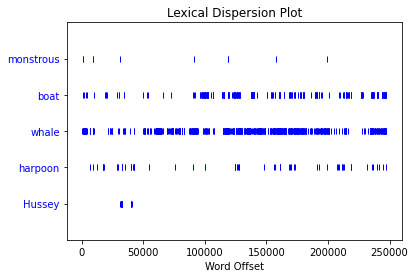

In [ ]:
text.dispersion_plot(['monstrous','boat', 'whale', 'harpoon', 'Hussey'])

Como podemos observar, las palabras “ballena” y “barco” aparecen a lo largo de todo el texto y además en partes comunes del mismo, sobre todo a partir de la mitad. También podremos observar que es en la primera parte del texto cuando se habla de la señora “Hussey” y que las palabras “harpa” y “monstruo” aparecen en general a lo largo del texto, aunque existen pocas ocurrencias de la palabra “monstruo”. 

### Vocabulario

Si queremos conocer el vocabulario de un texto, es decir, el número de tokens diferentes que aparecen en él, podemos utilizar la función **“vocab()**”de la clase **“Text”**.

El texto de Moby Dick con el que estamos trabajando en esta práctica está formado por un total de 247655 tokens, de los cuales 23380 son únicos, es decir, el texto tiene un vocabulario de 23380 tokens.

In [ ]:
text.vocab()

FreqDist({',': 19204, 'the': 13715, 'of': 6506, 'and': 6010, 'a': 4545, 'to': 4498, ';': 4173, 'in': 3897, 'that': 2954, "''": 2627, ...})

In [ ]:
len(text.vocab())

23380

### Palabras identificativas

¿Cómo podemos identificar las palabras más informativas sobre el tema y el género de un texto? Para contar el número de apariciones de las diferentes palabras de un texto deberíamos construir una distribución de frecuencias. NLTK proporciona soporte para ello con la clase **“FreqDist”**. 

A continuación, vamos a hacer uso de la clase **“FreqDist”** para calcular la frecuencia de las palabras del texto de Moby Dick y para ver cuáles son las 50 palabras más frecuentes. El método “**most_common(num)**” nos devuelve una lista de tuplas con las “num” palabras más frecuentes.

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(text)
most_common = fdist.most_common(30)
most_common


[(',', 19204),
 ('the', 13715),
 ('of', 6506),
 ('and', 6010),
 ('a', 4545),
 ('to', 4498),
 (';', 4173),
 ('in', 3897),
 ('that', 2954),
 ("''", 2627),
 ('his', 2448),
 ('I', 2068),
 ('it', 2007),
 ('!', 1767),
 ('--', 1713),
 ('is', 1711),
 ('with', 1654),
 ('he', 1651),
 ('was', 1631),
 ('as', 1620),
 ("'s", 1571),
 ('all', 1412),
 ('for', 1409),
 ('this', 1268),
 ('at', 1226),
 ('not', 1156),
 ('by', 1129),
 ('but', 1110),
 ('from', 1051),
 ('be', 1018)]

El primer valor de la tupla devuelto se corresponde con un token y el segundo con la frecuencia de aparición en el texto del mismo. Como podemos observar, la mayoría de las palabras no nos dicen nada sobre el texto, sino que simplemente son “palabras vacías” o signos de puntuación. Lo que demuestra que para obtener más información sobre el texto, sería adecuado eliminar las palabras vacías y los signos de puntuación.

Para analizar esta información de un simple vistazo podemos generar un diagrama con las frecuencias de las 30 palabras que más veces aparecen en el texto empleando el método “**plot(num, cumulative=False)**”: 

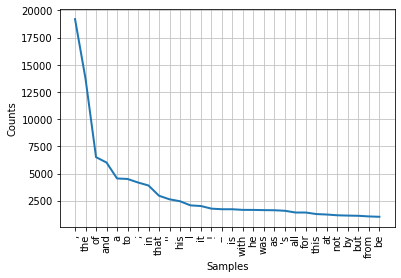

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(30, cumulative=False) 

Como hemos observado anteriormente, la mayor parte de estos tokens son “palabras vacías” y signos de puntuación. Si queremos saber la proporción del texto que está ocupada con tales palabras podemos generar un diagrama de frecuencias acumulativo utilizando el método “**plot(num, cumulative=True)**”:

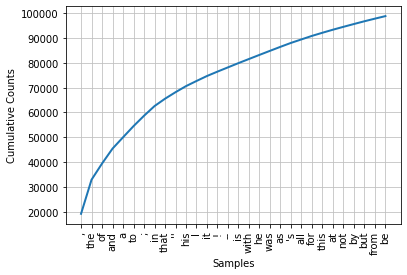

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
fdist.plot(30, cumulative=True) 

# Ejercicios

El resultado de esta práctica deberá entregarse en PLATEA antes de la fecha que se indique. Se entregará este mismo notebook de extensión *.ipynb* y se renombrará de la siguiente forma: pr3_usuario1_usuario2.ipynb. Sustituye "usuario1" y "usuario2" por el usuario de vuestro correo. Las prácticas se realizan por parejas.

Descargar los archivos “austen-sense.txt”, “carroll-alice.txt” y “chesterton-brown” que se encuentran disponibles en PLATEA (carpeta Material complementario) y realiza los métodos necesarios para que respondan a las siguientes preguntas: 


**Autores de la práctica:** 
Juan Bautista Muñoz Ruiz jbmr0001@red.ujaen.es 
Marco Antonio Carrión Soriano macs0021@red.ujaen.es


## Ejercicio 1

¿Cuántas veces aparece la palabra “girl” en cada uno de los archivos? ¿En qué contexto?


In [ ]:
from google.colab import drive  #Montamos el drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os #Abrimos la carpeta
path = os.chdir("/content/drive/MyDrive/PLN/P3")
os.getcwd()

'/content/drive/MyDrive/PLN/P3'

In [ ]:
import glob   #Lectura y procesado de los archivos
import xml.dom.minidom
archivosProcesados=[]
nombresArchivos=[]
for filename in glob.glob('*.txt'):  #Lectura de todos los archivos de la carpeta con la libreria glob
   with open(os.path.join(os.getcwd(), filename), 'r') as f:
     nombresArchivos.append(filename)
     fichero = open(f.name)
     archivosProcesados.append(fichero.read());
j=0
print('Archivos leídos:')
for i in archivosProcesados: #Mostramos el nombre del archivo y el contenido leído
  print(nombresArchivos[j])
  #print(i)
  j=j+1

Archivos leídos:
melville-moby_dick.txt
chesterton-brown.txt
austen-sense.txt
carroll-alice.txt


In [ ]:
from nltk import TreebankWordTokenizer
from nltk.text import Text

print('Veces que aparece la palabra "girl":')
for archivo in archivosProcesados: 
  tokenizer = TreebankWordTokenizer()
  tokens = tokenizer.tokenize(archivo)
  texto = Text(tokens) #Tokenizamos el texto
  print(texto,end="") #Mostramos nombre del texto
  print(":",end=" ")
  print(len(texto.concordance_list('girl'))) #Número de veces que aparece la palabra 
  texto.concordance('girl')  #Contexto
  print("")
  
  

Veces que aparece la palabra "girl":
<Text: Moby Dick by Herman Melville 1851>: 4
Displaying 4 of 4 matches:
 girl. Think of that ; by that sweet girl that old man has a child : hold ye t
he poor lad a sister ? Where 's that girl ? -- there , Betty , go to Snarles t
nd alive ! Aye , I widowed that poor girl when I married her , Starbuck ; and 
he past is somehow grown dim. Mary , girl ! thou fadest in pale glories behind

<Text: The Wisdom of Father Brown by G. K. Chesterton 1914>: 25
Displaying 25 of 35 matches:
dor , and the door opened on a young girl , decently dressed but disordered an
all I can make out , '' answered the girl , still breathing hard from her rush
 his name is Glass , '' answered the girl , in great impatience. '' I heard it
door and could n't , '' answered the girl shortly , '' Then I ran to the back-
y tail of the MacNabs ' street : the girl with the stern and breathless stride
 take those ropes off ? '' asked the girl stubbornly. Dr Hood replaced the sil
eyes ! 

## Ejercicio 2
¿Cuáles son las 4 palabras más similares por su contexto a la palabra más frecuente (tras eliminar las “palabras vacías” y los signos de puntuación) de cada uno de los textos?

In [ ]:
from nltk import TreebankWordTokenizer
from nltk.text import Text
from nltk.corpus import stopwords
import nltk
from nltk.probability import FreqDist
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokenizer = TreebankWordTokenizer()
for archivo in archivosProcesados:
  tokens = tokenizer.tokenize(archivo) #Tokenizamos cada archivo
  texto = Text(tokens) 
  print(texto)
  limpiada=[]
  for w in texto:
    if w.lower() not in stop_words and w.isalpha(): #La convertimos en minúscula y comprobamos si está en las stop words y no es un signo de puntuación
        limpiada.append(w) #Guardamos las que cumplan la condición
  te=Text(limpiada)

  
  fdist = FreqDist(te)
  comunes = fdist.most_common(20) # Obtenemos las 20 palabras mas comunes
  print("Palabra mas comun:",end=" ")
  i=0
  for elementos in comunes[0]: #Extraemos la palabra y la computamos con la función similar()
    if not i%2:  #Solo accedemos a las posiciones impares (las que contienen la palabra)
      print(elementos)
      print("Similares por contexto:",end=" ")
      te.similar(elementos, 4) #Buscamos sus cuatro similares por contexto
    i=i+1
  print(" ")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Text: Moby Dick by Herman Melville 1851>
Palabra mas comun: one
Similares por contexto: said nothing look better
 
<Text: The Wisdom of Father Brown by G. K. Chesterton 1914>
Palabra mas comun: said
Similares por contexto: asked see answered mr
 
<Text: Sense and Sensibility by Jane Austen 1811>
Palabra mas comun: Elinor
Similares por contexto: jennings palmer attachment could
 
<Text: Alice 's Adventures in Wonderland by Lewis Carroll 1865>
Palabra mas comun: said
Similares por contexto: thought head cried alice
 


## Ejercicio 3
Para cada uno de los textos, determinar en qué partes del texto se utilizan la palabra más frecuente y las 4 palabras más similares a ella utilizando el diagrama de dispersión correspondiente.

En este ejercicio no podemos usar la funcion "similar()" que se enseña en la práctica, puesto que esta funcion no devuelve nada, sino que muestra por pantalla las palabras. Para poder obtener las palabras en una lista utilizamos la funcion "similar_words", la cual tiene un funcionamiento y un criterio ligeramente distintos al de "similar()", por lo que los resultados son un poco distintos. aún así se observa que la palabra más común es la que más se repite en el texto.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Text: Moby Dick by Herman Melville 1851>


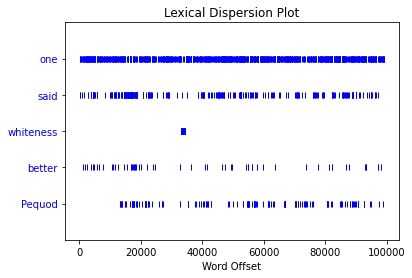

 
<Text: The Wisdom of Father Brown by G. K. Chesterton 1914>


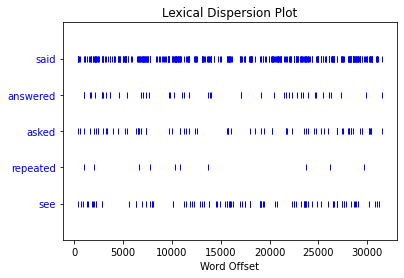

 
<Text: Sense and Sensibility by Jane Austen 1811>


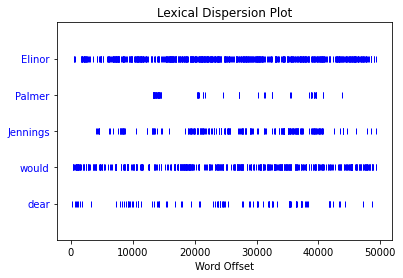

 
<Text: Alice 's Adventures in Wonderland by Lewis Carroll 1865>


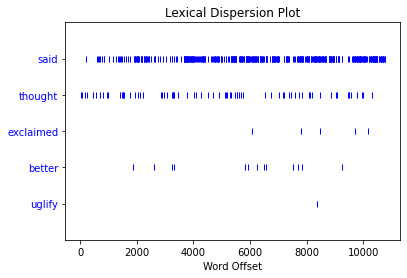

In [ ]:
from nltk import TreebankWordTokenizer
from nltk.text import Text
from nltk.corpus import stopwords
import nltk
from nltk.probability import FreqDist
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokenizer = TreebankWordTokenizer()
for archivo in archivosProcesados:
  tokens = tokenizer.tokenize(archivo) #Tokenizamos cada archivo
  texto = Text(tokens) 
  print(texto)
  limpiada=[]
  for w in texto:
    if w.lower() not in stop_words and w.isalpha(): #La convertimos en minúscula y comprobamos si está en las stop words y no es un signo de puntuación
        limpiada.append(w) #Guardamos las que cumplan la condición
  te=Text(limpiada)

  fdist = FreqDist(te)
  comunes = fdist.most_common(20) # Obtenemos las 20 palabras mas comunes
  i=0
  for elementos in comunes[0]: #Extraemos la palabra y la computamos con la función similar()
    context_index = nltk.text.ContextIndex(te)#Creo el contexto para buscar las palabras similares
    save = [ ]
    if not i%2:  #Solo accedemos a las posiciones impares (las que contienen la palabra)
      similar_words = context_index.similar_words(elementos,4) #Obtenemos las palabras similares por contexto
      te.dispersion_plot([elementos] + similar_words) #Muestro el gráfico con la posicion de las palabras en el texto
    i=i+1
  print(" ")

## Ejercicio 4
¿Qué proporción del texto ocupan las 50 palabras más frecuentes en cada uno de los archivos? ¿Y si eliminamos las “palabras vacías” y los signos de puntuación?

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Text: Moby Dick by Herman Melville 1851>

CON PALABRAS VACÍAS Y SIGNOS DE PUNTUACIÓN



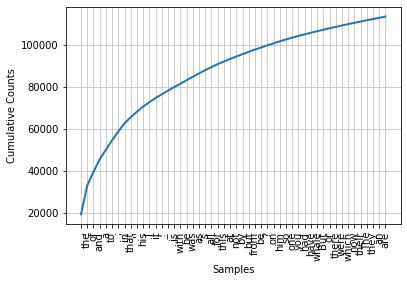



SIN PALABRAS VACÍAS NI SIGNOS DE PUNTUACIÓN



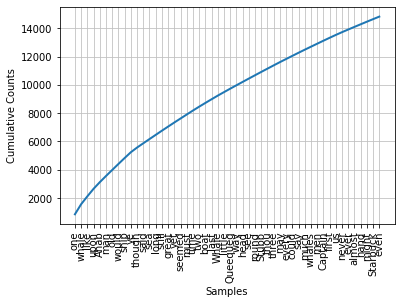



<Text: The Wisdom of Father Brown by G. K. Chesterton 1914>

CON PALABRAS VACÍAS Y SIGNOS DE PUNTUACIÓN



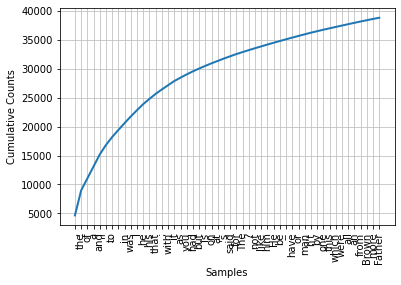



SIN PALABRAS VACÍAS NI SIGNOS DE PUNTUACIÓN



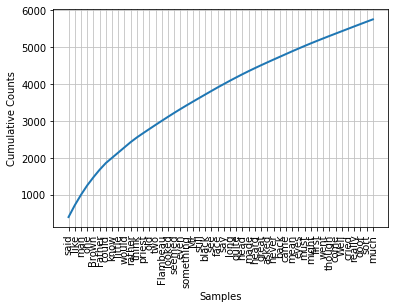



<Text: Sense and Sensibility by Jane Austen 1811>

CON PALABRAS VACÍAS Y SIGNOS DE PUNTUACIÓN



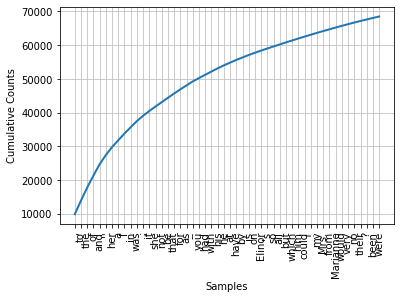



SIN PALABRAS VACÍAS NI SIGNOS DE PUNTUACIÓN



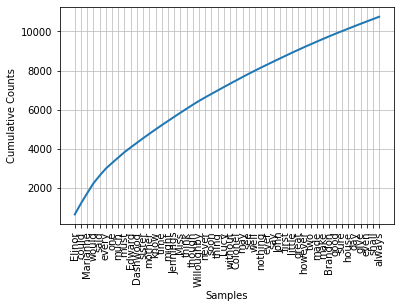



<Text: Alice 's Adventures in Wonderland by Lewis Carroll 1865>

CON PALABRAS VACÍAS Y SIGNOS DE PUNTUACIÓN



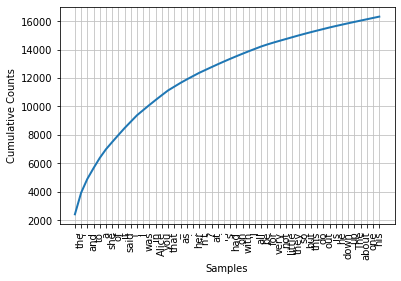



SIN PALABRAS VACÍAS NI SIGNOS DE PUNTUACIÓN



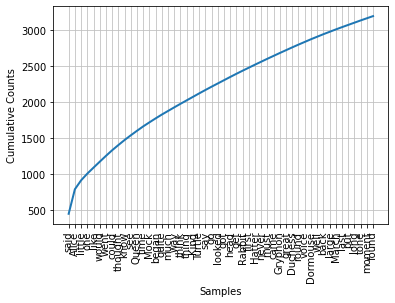

In [ ]:
from nltk import TreebankWordTokenizer
from nltk.text import Text
from nltk.corpus import stopwords
import nltk
from nltk.probability import FreqDist
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokenizer = TreebankWordTokenizer()
for archivo in archivosProcesados:
  tokens = tokenizer.tokenize(archivo) #Tokenizamos cada archivo
  texto = Text(tokens) 
  print(str(texto) + "\n")
  
  fdist = FreqDist(texto)
  comunes = fdist.most_common(50) # Obtenemos las 50 palabras mas comunes

  limpiada=[]
  for w in texto:
    if w.lower() not in stop_words and w.isalpha(): #La convertimos en minúscula y comprobamos si está en las stop words y no es un signo de puntuación
        limpiada.append(w) #Guardamos las que cumplan la condición
  te=Text(limpiada)

  fdist_limpias = FreqDist(te)
  comunes_limpias = fdist_limpias.most_common(50) # Obtenemos las 50 palabras mas comunes

  print("CON PALABRAS VACÍAS Y SIGNOS DE PUNTUACIÓN\n")
  fdist.plot(50, cumulative = True) 
  print("\n")

  print("SIN PALABRAS VACÍAS NI SIGNOS DE PUNTUACIÓN\n")
  fdist_limpias.plot(50, cumulative = True)
  print("\n")
